# **Import the Libraries**

In [34]:
import pandas as pd
import numpy as np

# **Import the Dataset**

In [35]:
data = pd.read_csv('House_Price.csv')
data

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers class,poor_prop,airport,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,Lake,55,YES,0.039474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,NO,Lake and River,27,YES,0.056006
502,20.6,0.04527,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,YES,Lake and River,20,YES,0.059903
503,23.9,0.06076,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,NO,None,31,YES,0.057572
504,22.0,0.10959,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,YES,None,47,YES,0.060694


# **Pre-processing**

In [36]:
data.dtypes

price             float64
crime_rate        float64
resid_area        float64
air_qual          float64
room_num          float64
age               float64
dist1             float64
dist2             float64
dist3             float64
dist4             float64
teachers class    float64
poor_prop         float64
airport            object
waterbody          object
rainfall            int64
bus_ter            object
parks             float64
dtype: object

In [37]:
data.bus_ter.value_counts()

YES    506
Name: bus_ter, dtype: int64

In [38]:
data.airport.value_counts()

YES    279
NO     227
Name: airport, dtype: int64

In [39]:
#bus_ter
data1 = data.drop('bus_ter', axis = 1)

#airport
data2 = data1.replace({"airport": 'NO'}, 0).replace({'airport':"YES"}, 1)

In [40]:
data2.waterbody.value_counts()

River             183
None              155
Lake               97
Lake and River     71
Name: waterbody, dtype: int64

In [41]:
data3 = pd.get_dummies(data2)
data3

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers class,poor_prop,airport,rainfall,parks,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,1,23,0.049347,0,0,0,1
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,0,42,0.046146,1,0,0,0
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,0,38,0.045764,0,0,1,0
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,1,45,0.047151,1,0,0,0
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,0,55,0.039474,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,0,27,0.056006,0,1,0,0
502,20.6,0.04527,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,1,20,0.059903,0,1,0,0
503,23.9,0.06076,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,0,31,0.057572,0,0,1,0
504,22.0,0.10959,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,1,47,0.060694,0,0,1,0


**Missing Value**

In [42]:
data3.isnull().sum()

price                       0
crime_rate                  0
resid_area                  0
air_qual                    0
room_num                    0
age                         0
dist1                       0
dist2                       0
dist3                       0
dist4                       0
teachers class              0
poor_prop                   0
airport                     0
rainfall                    0
parks                       0
waterbody_Lake              0
waterbody_Lake and River    0
waterbody_None              0
waterbody_River             0
dtype: int64

**Outlier Data**

<Axes: >

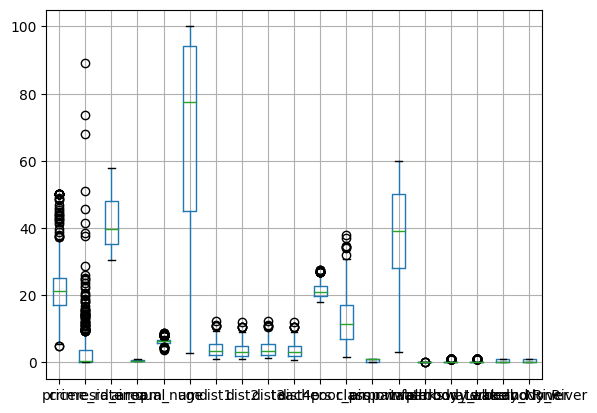

In [43]:
data3.boxplot()

<Axes: >

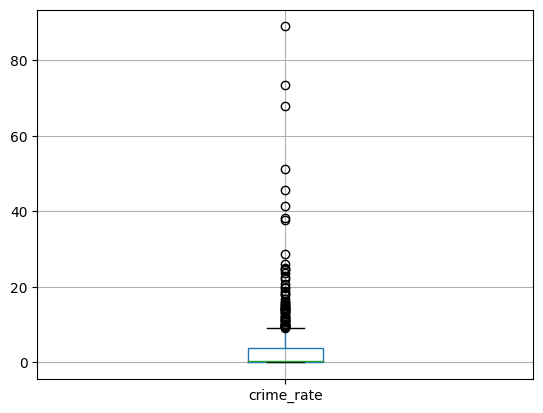

In [44]:
data3.iloc[:,[1]].boxplot()

In [45]:
Q1 = data3.iloc[:,1].quantile(0.25)
Q3 = data3.iloc[:,1].quantile(0.75)

LB = Q1 - 1.5 * (Q3 - Q1)
UB = Q3 + 1.5 * (Q3 - Q1)

print(LB,UB)

-5.31051125 9.06963875


In [46]:
data3[data3['crime_rate'] > 9.06963875].shape

(66, 19)

In [47]:
data4 = data3[data3['crime_rate'] <= 9.06963875].reset_index().drop('index', axis = 1)
data4

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers class,poor_prop,airport,rainfall,parks,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,1,23,0.049347,0,0,0,1
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,0,42,0.046146,1,0,0,0
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,0,38,0.045764,0,0,1,0
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,1,45,0.047151,1,0,0,0
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,0,55,0.039474,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,22.4,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,0,27,0.056006,0,1,0,0
436,20.6,0.04527,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,1,20,0.059903,0,1,0,0
437,23.9,0.06076,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,0,31,0.057572,0,0,1,0
438,22.0,0.10959,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,1,47,0.060694,0,0,1,0


**Duplicate Data**

In [48]:
data4.duplicated().sum()

0

**Feature Scaling**

In [18]:
X = data4.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,13,14]]
Y = data4.iloc[:,0]
binary = data4.iloc[:,[12,15,16,17,18]]

In [19]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_mm = mm.fit_transform(X)

In [20]:
X_mm_df = pd.DataFrame(X_mm, columns = X.columns)
data5 = pd.concat([X_mm_df, binary, Y], axis = 1)
data5

,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers class,poor_prop,rainfall,parks,airport,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River,price
0,0.000000,0.067815,0.314815,0.577505,0.641607,0.287757,0.262489,0.267986,0.279091,0.712766,0.099449,0.350877,0.300555,1,0,0,0,1,24.0
1,0.002338,0.242302,0.172840,0.547998,0.782698,0.344951,0.343324,0.352518,0.374545,0.446809,0.226744,0.684211,0.240620,0,1,0,0,0,21.6
2,0.002336,0.242302,0.172840,0.694386,0.599382,0.348525,0.357856,0.342626,0.366364,0.446809,0.070379,0.614035,0.233476,0,0,0,1,0,34.7
3,0.002902,0.063050,0.150206,0.658555,0.441813,0.453977,0.455041,0.446043,0.456364,0.351064,0.037026,0.736842,0.259433,1,1,0,0,0,33.4
4,0.006988,0.063050,0.150206,0.687105,0.528321,0.449508,0.448683,0.464928,0.447273,0.351064,0.110159,0.912281,0.115730,0,1,0,0,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,0.006273,0.420455,0.386831,0.580954,0.681771,0.134942,0.138965,0.140288,0.101818,0.106383,0.242962,0.421053,0.425197,0,0,1,0,0,22.4
436,0.004339,0.420455,0.386831,0.490324,0.760041,0.117069,0.108084,0.113309,0.109091,0.106383,0.224908,0.298246,0.498162,1,0,1,0,0,20.6
437,0.006065,0.420455,0.386831,0.654340,0.907312,0.108132,0.103542,0.098022,0.094545,0.106383,0.119645,0.491228,0.454524,0,0,0,1,0,23.9
438,0.011504,0.420455,0.386831,0.619467,0.889804,0.126005,0.126249,0.107914,0.124545,0.106383,0.145349,0.771930,0.512967,1,0,0,1,0,22.0


# **Spliting the Dataset into the Training set and the Test set**

In [50]:
X2 = data5.iloc[:,:-1]
Y2 = data5.iloc[:,-1]

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, test_size = 0.3, random_state = 0)

# **Feature Selection**

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

In [53]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso())
])

In [54]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,3,0.1)},
                      cv = 5,
                      scoring = 'neg_mean_squared_error',
                      verbose = 3
                      )

In [55]:
search.fit(X_train, Y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits
[CV 1/5] END ................model__alpha=0.1;, score=-20.699 total time=   0.0s
[CV 2/5] END ................model__alpha=0.1;, score=-20.207 total time=   0.0s
[CV 3/5] END ................model__alpha=0.1;, score=-12.728 total time=   0.0s
[CV 4/5] END ................model__alpha=0.1;, score=-17.133 total time=   0.0s
[CV 5/5] END ................model__alpha=0.1;, score=-25.518 total time=   0.0s
[CV 1/5] END ................model__alpha=0.2;, score=-20.459 total time=   0.0s
[CV 2/5] END ................model__alpha=0.2;, score=-21.450 total time=   0.0s
[CV 3/5] END ................model__alpha=0.2;, score=-13.051 total time=   0.0s
[CV 4/5] END ................model__alpha=0.2;, score=-17.467 total time=   0.0s
[CV 5/5] END ................model__alpha=0.2;, score=-25.945 total time=   0.0s
[CV 1/5] END model__alpha=0.30000000000000004;, score=-20.476 total time=   0.0s
[CV 2/5] END model__alpha=0.30000000000000004;,

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [56]:
search.best_params_

{'model__alpha': 0.1}

In [57]:
coef = search.best_estimator_[1].coef_

In [58]:
coef

array([-0.25943591, -0.        , -0.39083876,  4.48173397, -0.74693618,
       -1.8133963 , -0.        , -0.        , -0.        ,  1.84726484,
       -2.75133582,  0.2882594 , -0.        ,  0.28930335,  0.        ,
       -0.30193271,  0.01298271, -0.24693688])

In [59]:
features = X_train.columns.tolist()

**Features Considered by the model**

In [60]:
np.array(features)[coef != 0]

array(['crime_rate', 'air_qual', 'room_num', 'age', 'dist1',
       'teachers class', 'poor_prop', 'rainfall', 'airport',
       'waterbody_Lake and River', 'waterbody_None', 'waterbody_River'],
      dtype='<U24')

**Features discarded by the model**

In [61]:
np.array(features)[coef == 0]

array(['resid_area', 'dist2', 'dist3', 'dist4', 'parks', 'waterbody_Lake'],
      dtype='<U24')

In [63]:
X_train = X_train.drop(['resid_area', 'dist2', 'dist3', 'dist4', 'parks', 'waterbody_Lake'], axis = 1)

In [68]:
X_test = X_test.drop(['resid_area', 'dist2', 'dist3', 'dist4', 'parks', 'waterbody_Lake'], axis = 1)

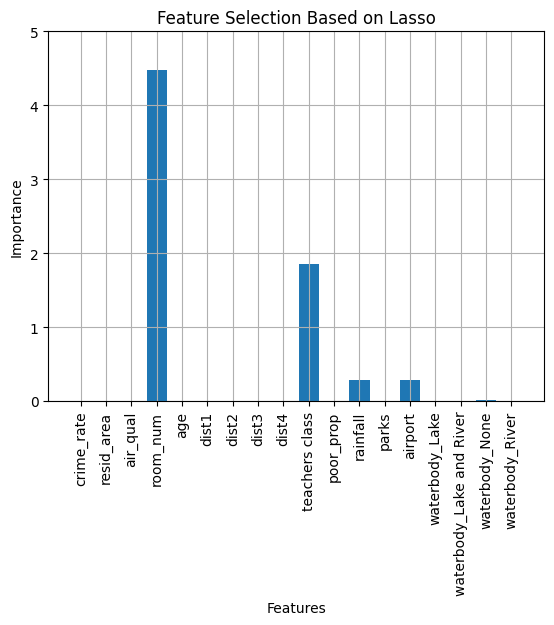

In [69]:
# plotting the Column Names and Importance of Columns.
plt.bar(features, coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 5)
plt.show()

# **Modelling**

***Linear Regression***

In [70]:
from sklearn.linear_model import LinearRegression

In [66]:
regr_model = LinearRegression()
regr_model.fit(X_train, Y_train)

LinearRegression()

In [71]:
pred_regr = regr_model.predict(X_test)

In [72]:
pred_regr

array([21.5849239 , 26.31428159, 26.93001571, 20.81124136, 16.39632969,
       21.38059851, 30.14599362, 31.22030388, 31.63692641, 25.67836494,
       19.06361644, 22.48295951, 19.24779355, 42.65381338, 37.70003831,
       23.20479949, 21.97980513, 22.94135686, 18.43703763, 13.8531336 ,
       27.36391313, 23.73020826, 35.78784073, 24.59536248, 17.58363311,
       14.77700129, 12.89024067, 24.34652556, 21.27649586, 34.37494364,
       18.35578833, 25.34937552, 22.77593212, 21.45933111, 19.84585459,
       24.20870587, 27.41980288, 29.19135875, 13.68676105, 28.72942577,
       21.26887104, 21.3805119 , 36.58609499, 20.64851669, 18.2396399 ,
       25.5583254 , 26.26732025, 33.39090624, 29.22349724, 21.64360558,
       19.06727356, 25.63691854, 26.20608473, 30.78986544, 14.02119558,
       26.71128452, 18.154813  , 17.49958029, 22.48723605, 10.86092321,
       25.10808377, 27.94399726, 23.28550414, 23.11818252, 26.57633528,
       19.83731427, 22.75741631, 11.31325397, 19.11252389, 16.38

# **Model Evaluation**

In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [74]:
#MSE
MSE = mean_squared_error(Y_test, pred_regr)

#RMSE
RMSE = np.sqrt(MSE)

#MAE
MAE = mean_absolute_error(Y_test, pred_regr)

#MAPE
MAPE = mean_absolute_percentage_error(Y_test, pred_regr)

#R2 Score
R2SCORE = r2_score(Y_test, pred_regr)

#Finalization
LR_data = {"MSE" : MSE, "RMSE" : RMSE, 'MAE' : MAE, 'MAPE' : MAPE, 'R2_Score' : R2SCORE}

LR = pd.DataFrame(LR_data, index = ["linear Regression"])

In [75]:
LR

,MSE,RMSE,MAE,MAPE,R2_Score
linear Regression,26.840184,5.180751,3.303956,0.148029,0.5913
